In [175]:
 import numpy as np
 import matplotlib.pyplot as plt


In [9]:
 def sigmoid(x):
     return 1 / (1 + np.exp(-x))

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.weights_1 = np.random.randn(input_size, hidden_size) * 0.1
        self.biases_1 = np.zeros((1, hidden_size))
        self.weights_2 = np.random.randn(hidden_size, output_size) * 0.1
        self.biases_2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.loss_history = []  # Store loss per epoch

    def forward_propagation(self, X):
        z_1 = np.dot(X, self.weights_1) + self.biases_1
        a_1 = sigmoid(z_1)
        z_2 = np.dot(a_1, self.weights_2) + self.biases_2
        output = sigmoid(z_2)
        return output, z_1, a_1, z_2

    def backpropagation(self, X, y, z_1, a_1, z_2, output):
        m = X.shape[0]
        delta_2 = (output - y) * (output * (1 - output))
        dw_2 = np.dot(a_1.T, delta_2)
        db_2 = np.sum(delta_2, axis=0, keepdims=True)
        delta_1 = np.dot(delta_2, self.weights_2.T) * (a_1 * (1 - a_1))
        dw_1 = np.dot(X.T, delta_1)
        db_1 = np.sum(delta_1, axis=0, keepdims=True)

        self.weights_2 -= self.learning_rate * dw_2 / m
        self.biases_2 -= self.learning_rate * db_2 / m
        self.weights_1 -= self.learning_rate * dw_1 / m
        self.biases_1 -= self.learning_rate * db_1 / m

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            total_loss = 0
            for i in range(len(X)):
                X_i = X[i].reshape(1, -1)
                y_i = y[i].reshape(1, -1)
                output, z_1, a_1, z_2 = self.forward_propagation(X_i)
                self.backpropagation(X_i, y_i, z_1, a_1, z_2, output)
                total_loss += np.mean((output - y_i) ** 2) 

            avg_loss = total_loss / len(X)
            self.loss_history.append(avg_loss)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}, Loss: {avg_loss:.6f}")

    def plot_loss(self):
        plt.plot(range(len(self.loss_history)), self.loss_history, label="Loss over epochs", color='blue')
        plt.xlabel("Epochs")
        plt.ylabel("Mean Squared Error (MSE)")
        plt.title("Training Loss Curve")
        plt.legend()
        plt.grid()
        plt.show()

    def evaluate(self, X, y):
        correct = 0
        for i in range(len(X)):
            pred, _, _, _ = self.forward_propagation(X[i].reshape(1, -1))
            predicted_label = 1 if pred[0][0] >= 0.5 else 0 
            actual_label = y[i][0]
            if predicted_label == actual_label:
                correct += 1

        accuracy = (correct / len(X)) * 100
        print(f"Test Accuracy: {accuracy:.2f}%")


In [27]:
 X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
 y = np.array([[0], [1], [1], [0]])

In [29]:
 model = NeuralNetwork(2, 4, 1)
 model.train(X, y, 1000)

Epoch 100, Loss: 0.253156
Epoch 200, Loss: 0.253145
Epoch 300, Loss: 0.253135
Epoch 400, Loss: 0.253124
Epoch 500, Loss: 0.253113
Epoch 600, Loss: 0.253103
Epoch 700, Loss: 0.253092
Epoch 800, Loss: 0.253082
Epoch 900, Loss: 0.253071
Epoch 1000, Loss: 0.253061


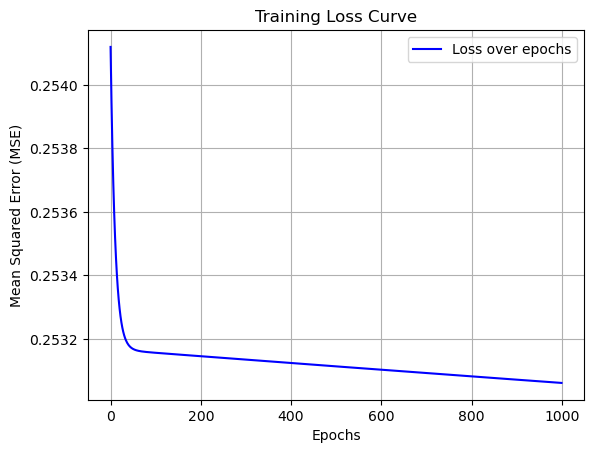

In [31]:
 model.plot_loss()

In [33]:
 for x in X:
     pred, _, _, _ = model.forward_propagation(x.reshape(1,-1))
     print(f"Input: {x} => Predicted Output: {pred}")

Input: [0 0] => Predicted Output: [[0.49946352]]
Input: [0 1] => Predicted Output: [[0.49976803]]
Input: [1 0] => Predicted Output: [[0.50027848]]
Input: [1 1] => Predicted Output: [[0.50058255]]


In [38]:
# Evaluate accuracy
model.evaluate(X, y)

Test Accuracy: 50.00%


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
df=pd.read_csv('iris.data')

In [58]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Epoch 100, Loss: 0.045956
Epoch 200, Loss: 0.025821
Epoch 300, Loss: 0.019251
Epoch 400, Loss: 0.015800
Epoch 500, Loss: 0.013616
Epoch 600, Loss: 0.012086
Epoch 700, Loss: 0.010941
Epoch 800, Loss: 0.010046
Epoch 900, Loss: 0.009323
Epoch 1000, Loss: 0.008725


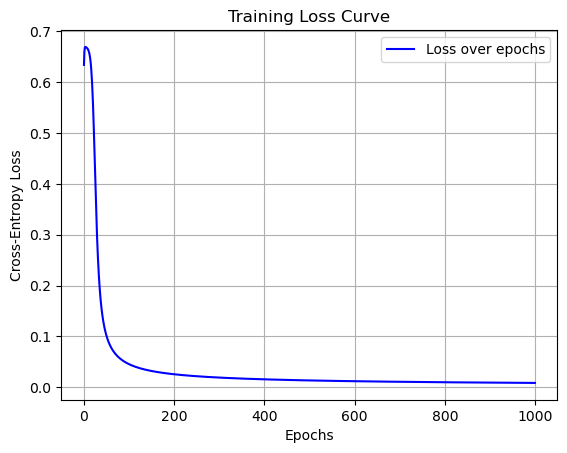

Test Accuracy: 0.00%


In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.weights_1 = np.random.randn(input_size, hidden_size) * 0.1
        self.biases_1 = np.zeros((1, hidden_size))
        self.weights_2 = np.random.randn(hidden_size, output_size) * 0.1
        self.biases_2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.loss_history = []

    def forward_propagation(self, X):
        z_1 = np.dot(X, self.weights_1) + self.biases_1
        a_1 = sigmoid(z_1)
        z_2 = np.dot(a_1, self.weights_2) + self.biases_2
        output = sigmoid(z_2)
        return output, z_1, a_1, z_2

    def backpropagation(self, X, y, z_1, a_1, z_2, output):
        m = X.shape[0]
        delta_2 = (output - y) * sigmoid_derivative(output)
        dw_2 = np.dot(a_1.T, delta_2)
        db_2 = np.sum(delta_2, axis=0, keepdims=True)

        delta_1 = np.dot(delta_2, self.weights_2.T) * sigmoid_derivative(a_1)
        dw_1 = np.dot(X.T, delta_1)
        db_1 = np.sum(delta_1, axis=0, keepdims=True)

        self.weights_2 -= self.learning_rate * dw_2 / m
        self.biases_2 -= self.learning_rate * db_2 / m
        self.weights_1 -= self.learning_rate * dw_1 / m
        self.biases_1 -= self.learning_rate * db_1 / m

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            total_loss = 0
            for i in range(len(X)):
                X_i = X[i].reshape(1, -1)
                y_i = y[i].reshape(1, -1)
                
                output, z_1, a_1, z_2 = self.forward_propagation(X_i)
                self.backpropagation(X_i, y_i, z_1, a_1, z_2, output)
                
                total_loss += -np.sum(y_i * np.log(output + 1e-8))  # Cross-entropy loss
            
            avg_loss = total_loss / len(X)
            self.loss_history.append(avg_loss)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}, Loss: {avg_loss:.6f}")

    def plot_loss(self):
        plt.plot(range(len(self.loss_history)), self.loss_history, label="Loss over epochs", color='blue')
        plt.xlabel("Epochs")
        plt.ylabel("Cross-Entropy Loss")
        plt.title("Training Loss Curve")
        plt.legend()
        plt.grid()
        plt.show()

    def evaluate(self, X, y):
        correct = 0
        for i in range(len(X)):
            pred, _, _, _ = self.forward_propagation(X[i].reshape(1, -1))
            predicted_label = np.argmax(pred)
            actual_label = np.argmax(y[i])
            if predicted_label == actual_label:
                correct += 1
        accuracy = (correct / len(X)) * 100
        print(f"Test Accuracy: {accuracy:.2f}%")

# ---------------------------
# Load and preprocess Iris dataset manually
# ---------------------------
iris_path = "C:/Users/HP/Downloads/1322525094530_ML Lab 11.03.2025/iris.data"

# Load dataset
data = []
labels = []
label_dict = {'Iris-setosa': [1, 0, 0], 'Iris-versicolor': [0, 1, 0], 'Iris-virginica': [0, 0, 1]}

with open(iris_path, 'r') as file:
    for line in file.readlines():
        values = line.strip().split(',')
        if len(values) < 5:
            continue
        features = list(map(float, values[:4]))  # First 4 values are features
        label = label_dict[values[4]]  
        data.append(features)
        labels.append(label)

data = np.array(data)
labels = np.array(labels)

# Normalize features (optional but recommended)
data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))

# Train-Test Split
X_train, y_train = data[:100], labels[:100]
X_test, y_test = data[100:], labels[100:]

# Initialize and train the neural network
nn = NeuralNetwork(input_size=4, hidden_size=8, output_size=3, learning_rate=0.1)
nn.train(X_train, y_train, epochs=1000)

# Plot training loss
nn.plot_loss()

# Evaluate on test data
nn.evaluate(X_test, y_test)


In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.weights_1 = np.random.randn(input_size, hidden_size) * 0.1
        self.biases_1 = np.zeros((1, hidden_size))
        self.weights_2 = np.random.randn(hidden_size, output_size) * 0.1
        self.biases_2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.loss_history = []

    def forward_propagation(self, X):
        self.z_1 = np.dot(X, self.weights_1) + self.biases_1
        self.a_1 = sigmoid(self.z_1)
        self.z_2 = np.dot(self.a_1, self.weights_2) + self.biases_2
        self.output = softmax(self.z_2)
        return self.output

    def backpropagation(self, X, y):
        m = X.shape[0]
        
        
        delta_2 = self.output - y
        dw_2 = np.dot(self.a_1.T, delta_2)
        db_2 = np.sum(delta_2, axis=0, keepdims=True)

        delta_1 = np.dot(delta_2, self.weights_2.T) * sigmoid_derivative(self.a_1)
        dw_1 = np.dot(X.T, delta_1)
        db_1 = np.sum(delta_1, axis=0, keepdims=True)

        
        self.weights_2 -= self.learning_rate * dw_2 / m
        self.biases_2 -= self.learning_rate * db_2 / m
        self.weights_1 -= self.learning_rate * dw_1 / m
        self.biases_1 -= self.learning_rate * db_1 / m

    def compute_loss(self, y_true):
        loss = -np.mean(np.sum(y_true * np.log(self.output + 1e-8), axis=1))
        return loss

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            self.forward_propagation(X)
            self.backpropagation(X, y)
            loss = self.compute_loss(y)
            self.loss_history.append(loss)

            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch+1}, Loss: {loss:.6f}")

    def plot_loss(self):
        plt.plot(range(len(self.loss_history)), self.loss_history, label="Loss over epochs", color='blue')
        plt.xlabel("Epochs")
        plt.ylabel("Cross-Entropy Loss")
        plt.title("Training Loss Curve")
        plt.legend()
        plt.grid()
        plt.show()

    def evaluate(self, X, y):
        preds = self.forward_propagation(X)
        predicted_labels = np.argmax(preds, axis=1)
        actual_labels = np.argmax(y, axis=1)
        accuracy = np.mean(predicted_labels == actual_labels) * 100
        print(f"Test Accuracy: {accuracy:.2f}%")

df = pd.read_csv("iris.data")


label_dict = {'Iris-setosa': [1, 0, 0], 'Iris-versicolor': [0, 1, 0], 'Iris-virginica': [0, 0, 1]}
df.iloc[:, -1] = df.iloc[:, -1].map(label_dict)


data = df.iloc[:, :-1].values 
labels = np.array(df.iloc[:, -1].tolist())  


data = (data - np.min(data, axis=0)) / (np.max(data, axis=0) - np.min(data, axis=0))


indices = np.arange(len(data))
np.random.seed(42)
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


In [185]:
split = int(0.8 * len(data))
X_train, y_train = data[:split], labels[:split]
X_test, y_test = data[split:], labels[split:]


nn = NeuralNetwork(input_size=4, hidden_size=8, output_size=3, learning_rate=0.1)
nn.train(X_train, y_train, epochs=1000)



Epoch 100, Loss: 1.093067
Epoch 200, Loss: 1.082129
Epoch 300, Loss: 1.047842
Epoch 400, Loss: 0.960175
Epoch 500, Loss: 0.810677
Epoch 600, Loss: 0.659779
Epoch 700, Loss: 0.555520
Epoch 800, Loss: 0.489396
Epoch 900, Loss: 0.443953
Epoch 1000, Loss: 0.409154


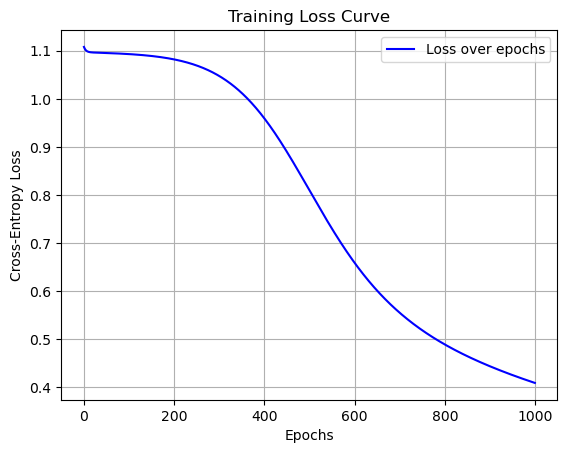

In [187]:
nn.plot_loss()

In [189]:
nn.evaluate(X_test, y_test)

Test Accuracy: 96.67%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
data=pd.read_csv("iris.data")
print("Data loded");

Data loded


In [161]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [163]:
x_train = data.iloc[:, :-1].to_numpy().astype(np.float64)
y_train = data.iloc[:, -1].to_numpy()
print(x_train);
print(y_train);


[[4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.

In [165]:
import numpy as np


def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m  
    return loss

In [173]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.weights_1 = np.random.randn(input_size, hidden_size) * 0.1
        self.biases_1 = np.zeros((1, hidden_size))
        self.weights_2 = np.random.randn(hidden_size, output_size) * 0.1
        self.biases_2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        self.loss_history = []

    def forward_propagation(self, X):
        z_1 = np.dot(X, self.weights_1) + self.biases_1
        a_1 = relu(z_1)
        z_2 = np.dot(a_1, self.weights_2) + self.biases_2
        #relu
        output = relu(z_2)  
        return output, z_1, a_1, z_2

    def backpropagation(self, X, y, z_1, a_1, z_2, output):
        m = X.shape[0]

        # Output layer error
        delta_2 = output - y  # Softmax gradient
        dw_2 = np.dot(a_1.T, delta_2) / m
        db_2 = np.sum(delta_2, axis=0, keepdims=True) / m

        # Hidden layer error
        delta_1 = np.dot(delta_2, self.weights_2.T) * relu_derivative(z_1)
        dw_1 = np.dot(X.T, delta_1) / m
        db_1 = np.sum(delta_1, axis=0, keepdims=True) / m

        # Update weights
        self.weights_2 -= self.learning_rate * dw_2
        self.biases_2 -= self.learning_rate * db_2
        self.weights_1 -= self.learning_rate * dw_1
        self.biases_1 -= self.learning_rate * db_1

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output, z_1, a_1, z_2 = self.forward_propagation(X)
            loss = cross_entropy_loss(y, output)
            self.loss_history.append(loss)
            self.backpropagation(X, y, z_1, a_1, z_2, output)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    def predict(self, X):
        output, _, _, _ = self.forward_propagation(X)
        return np.argmax(output, axis=1)

    def plot_loss(self):
        plt.plot(range(len(self.loss_history)), self.loss_history, label="Loss␣over epochs", color='blue')
        plt.xlabel("Epochs")
        plt.ylabel("Mean Squared Error (MSE)")
        plt.title("Training Loss Curve")
        plt.legend()
        plt.grid()
        plt.show()


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


X = data.iloc[:, :-1].to_numpy().astype(np.float64)
y = data.iloc[:, -1].to_numpy() # Replace with actual labels


encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [169]:
nn = NeuralNetwork(input_size=4, hidden_size=10, output_size=3, learning_rate=0.01)
nn.train(X_train, y_train, epochs=1000)
y_pred = nn.predict(X_test)
y_true = np.argmax(y_test, axis=1)

# Accuracy
accuracy = np.mean(y_pred == y_true)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 0, Loss: 14.3887
Epoch 10, Loss: 1.9119
Epoch 20, Loss: 1.3658
Epoch 30, Loss: 1.1120
Epoch 40, Loss: 0.9822
Epoch 50, Loss: 0.9108
Epoch 60, Loss: 0.8647
Epoch 70, Loss: 0.8297
Epoch 80, Loss: 0.7996
Epoch 90, Loss: 0.7723
Epoch 100, Loss: 0.7469
Epoch 110, Loss: 0.7231
Epoch 120, Loss: 0.7009
Epoch 130, Loss: 0.6804
Epoch 140, Loss: 0.6616
Epoch 150, Loss: 0.6444
Epoch 160, Loss: 0.6289
Epoch 170, Loss: 0.6151
Epoch 180, Loss: 0.6031
Epoch 190, Loss: 0.5925
Epoch 200, Loss: 0.5832
Epoch 210, Loss: 0.5749
Epoch 220, Loss: 0.5673
Epoch 230, Loss: 0.5605
Epoch 240, Loss: 0.5543
Epoch 250, Loss: 0.5484
Epoch 260, Loss: 0.5431
Epoch 270, Loss: 0.5380
Epoch 280, Loss: 0.5332
Epoch 290, Loss: 0.5288
Epoch 300, Loss: 0.5245
Epoch 310, Loss: 0.5207
Epoch 320, Loss: 0.5171
Epoch 330, Loss: 0.5138
Epoch 340, Loss: 0.5107
Epoch 350, Loss: 0.5079
Epoch 360, Loss: 0.5051
Epoch 370, Loss: 0.5025
Epoch 380, Loss: 0.5001
Epoch 390, Loss: 0.4978
Epoch 400, Loss: 0.4957
Epoch 410, Loss: 0.4936
Ep

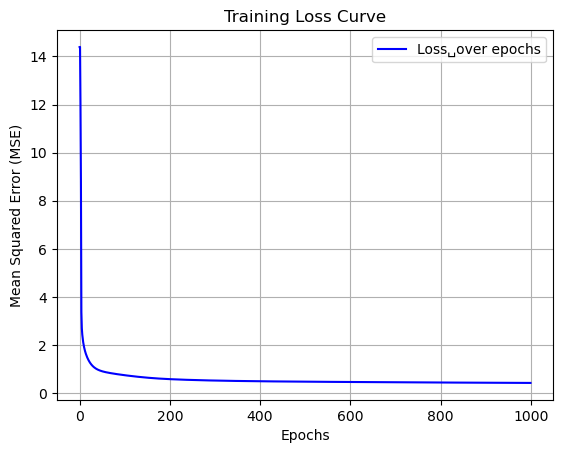

In [171]:
nn.plot_loss()